In [9]:
"""
Created on Sun Mar 22 14:05:01 2020

@author: krishanagyanwali
"""
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize


In [11]:
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [12]:
tweets = pd.read_csv('coronavirus3.csv', encoding='utf-8')

In [13]:
tweets.columns = ['timestamp', 'text']

In [14]:
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 


# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and 'rt' not in word and '@' not in word and '<' not in word])

tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('rt', ' ', x))

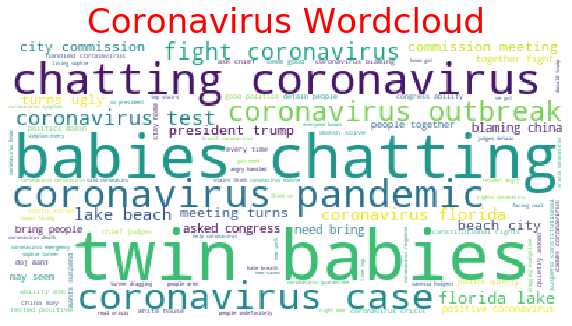

In [15]:

def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,max_words = 2000).generate(" ".join([i for i in tweets[col]]))
    plt.figure(figsize=(10,8), facecolor='w', edgecolor='blue')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Coronavirus Wordcloud", color='red', fontsize=34)
    plt.show()
wordcloud(tweets, 'text') 
plt.close()
file = tweets['text']

In [16]:

sentiments = file
# install Vader and make sure you download the lexicon as well
sia = SentimentIntensityAnalyzer()
# this step will return an error if you have not installed the lexicon
result = {"positive":0,"neutral":0,"negative":0}
for x in sentiments: 
    ss = sia.polarity_scores(x)
    if ss["compound"] == 0.0: 
        result["neutral"] +=1
    elif ss["compound"] > 0.0:
        result["positive"] +=1
    else:
        result["negative"] +=1
print(result)

{'positive': 15001, 'neutral': 14191, 'negative': 19291}


***Sentiment Analysis Bar Chart****


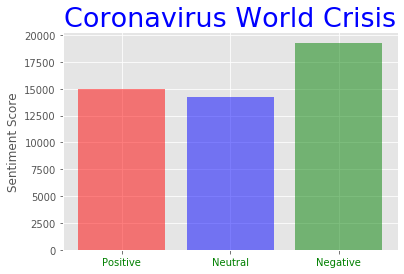

In [17]:

print('***Sentiment Analysis Bar Chart****')

objects = ('Positive', 'Neutral', 'Negative')

p = result['positive']
n = result['neutral']
ne = result['negative']
y_pos = np.arange(len(objects))
performance = [p, n, ne]


plt.bar(y_pos, performance, align='center', alpha=0.5, color = ['r', 'b', 'g'])
plt.xticks(y_pos, objects, color='green')
plt.ylabel('Sentiment Score')
plt.title('Coronavirus World Crisis', color='blue', fontsize=27)
plt.show()
plt.close()